# Pandas로 국민청원 데이터 분석하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [3]:
df.shape #395547열, 9행

(395547, 8)

In [4]:
df.head(5) #앞 5행 미리보기

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.isnull().sum() #content 열에 결측치 1 있음, 나머지 결측치 0

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [6]:
df.info() #칼럼명과 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [7]:
df.describe() #수치형 데이터 요약

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [8]:
df.describe(include=np.object) #카테고리 형태의 데이터 요약

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


### 1. 20만 이상 투표를 받은 '답변대상 청원' 분야별 순위

In [9]:
df_20 = df.loc[df['votes'] > 200000] #20만건 이상 투표를 받은 '답변대상 청원' 보기
df_20.category.value_counts() #카테고리별 '답변대상 청원' 개수

인권/성평등         24
안전/환경          10
정치개혁            8
기타              8
문화/예술/체육/언론     7
외교/통일/국방        4
반려동물            4
보건복지            3
육아/교육           3
교통/건축/국토        3
경제민주화           2
성장동력            2
미래              1
행정              1
Name: category, dtype: int64

In [10]:
df_20_cat = df_20.category.value_counts()
df_20_category = df_20_cat.to_frame().reset_index()
df_20_category.columns = ['category','count']
df_20_category

,category,count
0,인권/성평등,24
1,안전/환경,10
2,정치개혁,8
3,기타,8
4,문화/예술/체육/언론,7
5,외교/통일/국방,4
6,반려동물,4
7,보건복지,3
8,육아/교육,3
9,교통/건축/국토,3


In [11]:
# matplotlib 한글 폰트 설정
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
%matplotlib inline

['NanumGothic']


Text(0.5, 1.0, '20만 이상 청원(답변대상 청원) 분야별 순위')

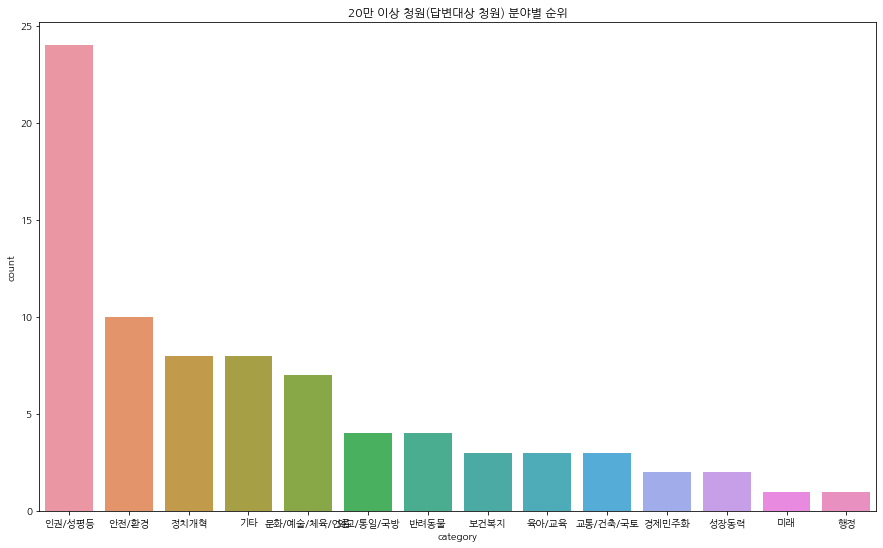

In [12]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='category', y='count', data=df_20_category)
ax.set_title('20만 이상 청원(답변대상 청원) 분야별 순위')

#### 1) 20만건 이상 투표를 받은 '답변대상 청원' 분야는 <인권/성평등>이 월등히 많았고, <안전/환경>이 2순위, <정치개혁>이 3순위로 그 뒤를 따른다.
#### 2) 반면 <행정>과 <미래> 분야의 청원은 가장 적은 수의 '답변대상 청원'을 보인다.

### 2. '답변대상 청원' 중 실제로 답변이 된 수 & 비율

In [13]:
df['answer'] = (df['votes'] > 200000) == 1 #20만건 이상 투표를 받은 'answer' column
df['no_answer'] = (df['votes'] < 200000) == 1 #20만건 이상 투표를 받지 못한 'no_answer' column

In [14]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                  bool
no_answer               bool
dtype: object

In [15]:
df['answer'] = df['answer'].astype('int') #새로 생성해 준 answer의 타입은 boolean 타입이므로 -> int로 변경
df['no_answer'] = df['no_answer'].astype('int') #새로 생성해 준 no_answer의 타입은 boolean 타입이므로 -> int로 변경

In [16]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum() #'답변대상 청원' 중 아직 답변되지 않은 청원의 수

51

In [17]:
is_answered = df['answered'] == 1
subset_df = df[is_answered]
subset_df

,article_id,start,end,answered,votes,category,title,content,answer,no_answer,answer_diff
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,1,0,0
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0,0
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,1,0,0
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",1,0,0
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",1,0,0
47285,49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",1,0,0
54896,57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,1,0,0
70744,76020,2017-12-28,2018-01-27,1,228295,성장동력,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...,1,0,0
73197,79162,2018-01-03,2018-02-02,1,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,1,0,0
74640,81026,2018-01-06,2018-02-05,1,213219,인권/성평등,초.중.고 학교 페미니즘교육 의무화,아직 판단이 무분별한 어린학생들이 학교에서 여성비하적요소가 들어있는 단어들을 아무렇...,1,0,0


In [18]:
subset_df_category = subset_df.category.value_counts()
subset_df_count = subset_df_category.to_frame().reset_index()
subset_df_count.columns = ['category','yes']
subset_df_count

,category,yes
0,인권/성평등,9
1,문화/예술/체육/언론,4
2,보건복지,2
3,정치개혁,2
4,안전/환경,2
5,성장동력,2
6,교통/건축/국토,2
7,미래,1
8,외교/통일/국방,1
9,기타,1


In [19]:
result = pd.merge(subset_df_count, df_20_category,on='category')
result['no'] = result['count'] - result['yes']
result1 = result[['category', 'yes', 'no']]
result1

,category,yes,no
0,인권/성평등,9,15
1,문화/예술/체육/언론,4,3
2,보건복지,2,1
3,정치개혁,2,6
4,안전/환경,2,8
5,성장동력,2,0
6,교통/건축/국토,2,1
7,미래,1,0
8,외교/통일/국방,1,3
9,기타,1,7


Text(0.5, 1.0, '답변대상 청원 중 실제로 답변 받은 수 순위')

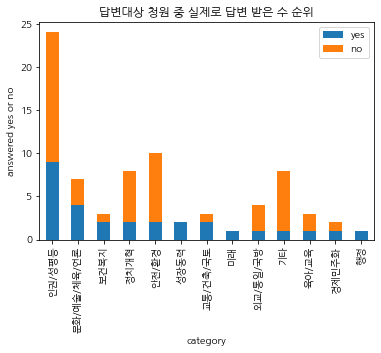

In [20]:
ax = result1.plot.bar(x='category',stacked=True)
ax.set_ylabel('answered yes or no')
ax.set_title('답변대상 청원 중 실제로 답변 받은 수 순위')

#### 1) 20만건 이상 투표를 받은 '답변대상 청원' 중 실제로 답변을 받은 수는 <인권/성평등>이 가장 많다. <인권/성평등> 분야의 청원이 월등히 많았던 만큼, 답변 받은 수도 많다.

#### 2) <행정>과 <미래> 분야의 청원은 가장 적은 수의 '답변대상 청원'이었지만, 모두 답변되었다.

In [21]:
result['ratio'] = result['yes'] / (result['count'])
result2 = result[['category', 'ratio']]
result2

,category,ratio
0,인권/성평등,0.375000
1,문화/예술/체육/언론,0.571429
2,보건복지,0.666667
3,정치개혁,0.250000
4,안전/환경,0.200000
5,성장동력,1.000000
6,교통/건축/국토,0.666667
7,미래,1.000000
8,외교/통일/국방,0.250000
9,기타,0.125000


Text(0.5, 1.0, '답변대상 청원 중 실제로 답변 받은 수 비율')

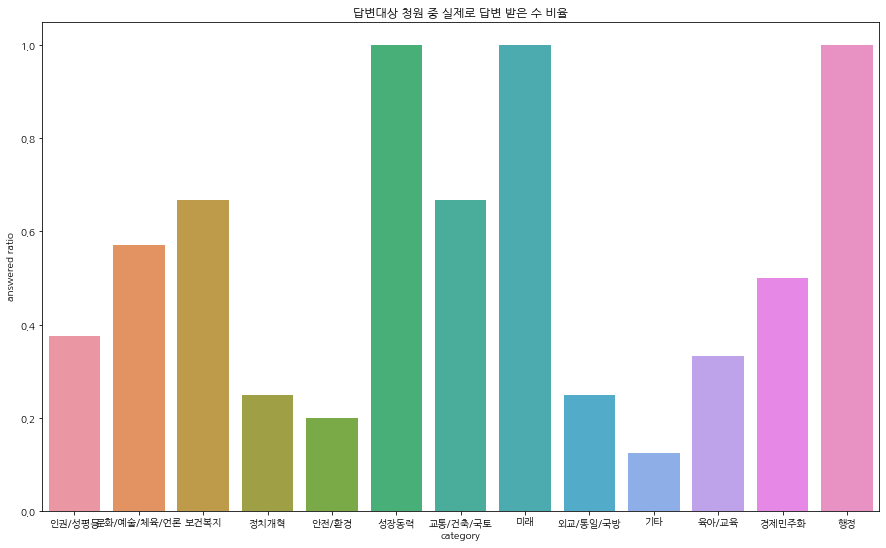

In [22]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='category',y='ratio', data=result2)
ax.set_ylabel('answered ratio')
ax.set_title('답변대상 청원 중 실제로 답변 받은 수 비율')

#### 1) 20만건 이상 투표를 받은 '답변대상 청원' 중 실제로 답변을 받은 '비율'을 살펴보면 <성장동력>과 <미래>, <행정> 분야에서는 모두 답변되었기에 가장 높은 답변 비율을 보인다.

#### 2) 오히려 <인권/성평등>의 답변 비율은 0.5를 넘지 않는 것을 알 수 있다. 
#### <인권/성평등> 분야의 답변대상 청원 요구는 가장 많았지만 답변 비율은 하위에 속하는 만큼, 이에 대한 대응이 필요하다 볼 수 있겠다.

### 3. '답변대상 청원' 중 투표는 어느 분야가 가장 많이 받았는가?

In [23]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5) #답변 대상 청원 중 투표를 가장 많이 받은 것; 강서구 피시방 살인사건

,article_id,start,end,answered,votes,category,title,content,answer,no_answer,answer_diff
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,0,1
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,0,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0,0
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0,0


In [24]:
k = answered_df.groupby(answered_df['category']).sum('votes')
kk = k.sort_values('votes', ascending=False).reset_index()
kkk = kk[['category','votes']]
kkk

,category,votes
0,인권/성평등,6345077
1,안전/환경,3206169
2,정치개혁,2147763
3,기타,2104193
4,문화/예술/체육/언론,1937133
5,외교/통일/국방,1585690
6,반려동물,867561
7,육아/교육,852295
8,교통/건축/국토,842498
9,보건복지,749906


Text(0.5, 1.0, '답변대상 청원 중 가장 많은 투표를 받은 분야는?')

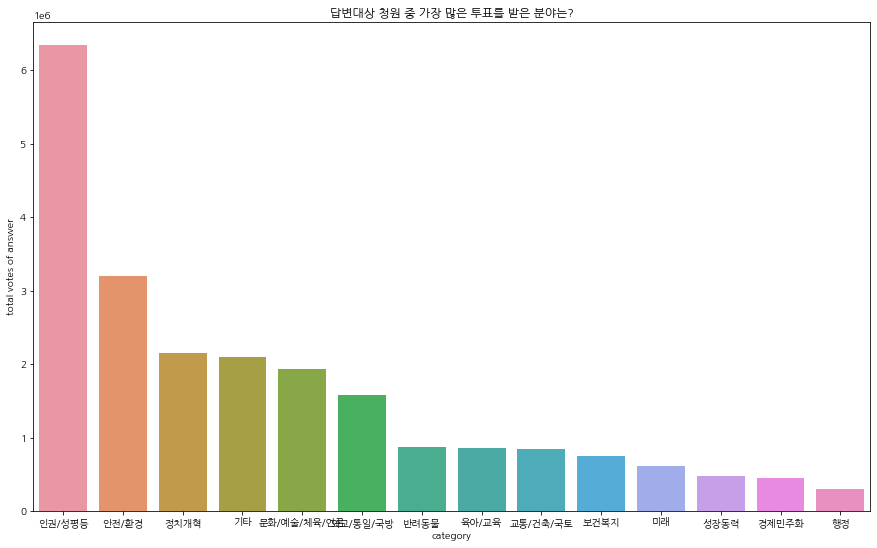

In [25]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='category',y='votes', data=kkk)
ax.set_ylabel('total votes of answer')
ax.set_title('답변대상 청원 중 가장 많은 투표를 받은 분야는?')

#### 1) '답변대상 청원' 중 <인권/성평등> 분야의 투표 총합이 가장 높다. 이어서 답변 대상 청원 중 투표를 가장 많이 받은; 강서구 피시방 살인사건이 속한 <안전/환경> 분야가 '답변대상 청원' 중 두 번째로 투표 수가 많다.

#### 2) '답변대상 청원' 수가 가장 적었던 <행정> 분야에서, '답변대상 청원' 투표 총합도 가장 낮다.

### 4. 어느 분야에서 청원이 가장 많이 들어왔는가?

In [26]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category #어느 분야의 청원이 가장 많이 들어왔는지; 정치개혁

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


Text(0.5, 1.0, '가장 많은 청원을 받은 분야는?')

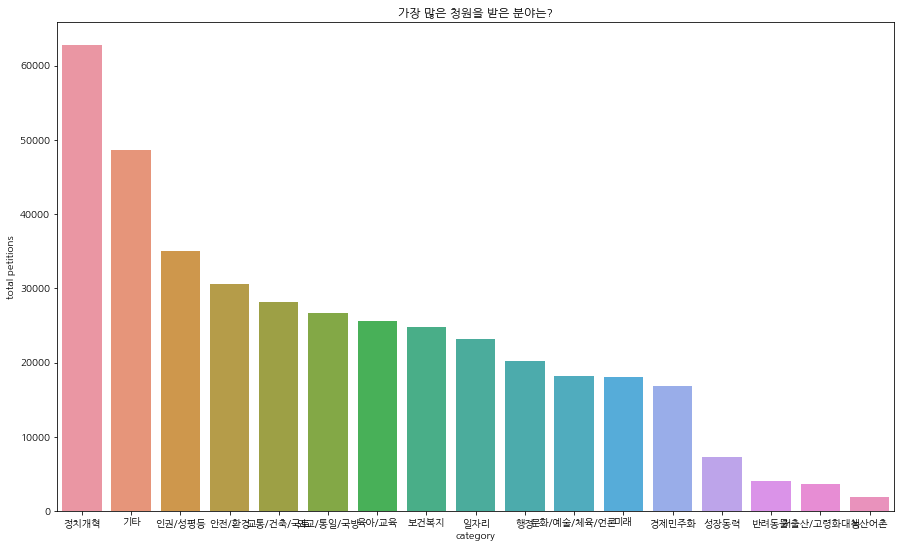

In [27]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='category',y='counts', data=category)
ax.set_ylabel('total petitions')
ax.set_title('가장 많은 청원을 받은 분야는?')

#### 1) 가장 많은 청원을 받은 분야는 <정치개혁> 분야이다. 이를 통해 <정치개혁>은 청원을 가장 많이 받았지만, 20만 건 이상 받은 청원은 가장 많지 않은 것으로 보아 투표가 분산되어 있음을 알 수 있다.

#### 2) 가장 적은 청원을 받은 분야는 <농산어촌> 분야였다.

### 5. 날짜별 청원 수 시계열 그래프

In [28]:
start_df = pd.DataFrame(df['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head() #청원이 가장 많이 들어 온 날; 2017-11-11

청원 집계: 535일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [29]:
time = start_df.sort_values('start')
time1 = time.set_index('start')
time1

,counts
start,
2017-08-19,39
2017-08-20,88
2017-08-21,89
2017-08-22,69
2017-08-23,80
...,...
2019-01-31,994
2019-02-01,879
2019-02-02,522


<AxesSubplot:title={'center':'날짜별 청원 수'}, xlabel='start'>

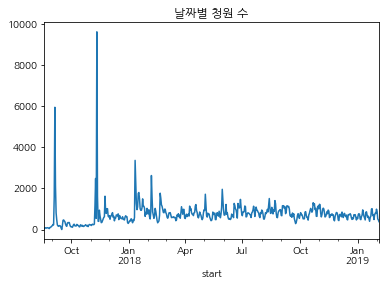

In [30]:
time1['counts'].plot(title = '날짜별 청원 수')

#### 2017-08-19부터 2019-02-04까지 날짜별 청원 수를 나타낸 시계열 그래프이다. 위 그래프에서 청원 수가 거의 10000에 가까운, 가장 큰 지점이 청원이 가장 많이 들어 온 날; 2017-11-11임을 알 수 있다.

In [31]:
m = df.set_index('start')
m.loc['2017-11-11']

,article_id,end,answered,votes,category,title,content,answer,no_answer,answer_diff
start,,,,,,,,,,
2017-11-11,31383,2017-12-11,0,1,정치개혁,이명박 출국금지,이명박 출국금지\n조속한 구속수사,0,1,0
2017-11-11,31384,2017-12-11,0,3,인권/성평등,조두순 출소 금지,조두순의 출소금지 특별법 제정을 촉구 합니다.,0,1,0
2017-11-11,31386,2017-12-11,0,39,정치개혁,이명박 출국금지,정의가 바로 선 나라를 만들기 위해 꼭...!,0,1,0
2017-11-11,31387,2017-12-11,0,2,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,0,1,0
2017-11-11,31388,2017-12-11,0,1,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2017-11-11,41068,2017-12-11,0,0,정치개혁,이명박 출금,MB 출금,0,1,0
2017-11-11,41069,2017-12-11,0,2,정치개혁,이명박 전대통령 출국금지 청원,수사대상이 될 인물이 출국하면 안 되겠지요.,0,1,0
2017-11-11,41070,2017-12-11,0,2,기타,이명박 출국금지,죄갑을 치루고 출국,0,1,0


In [32]:
mm = m.loc['2017-11-11']
mm.category.value_counts()

정치개혁           7961
기타              865
미래              170
인권/성평등          154
안전/환경           128
외교/통일/국방         61
행정               59
경제민주화            47
육아/교육            46
일자리              25
반려동물             24
보건복지             20
문화/예술/체육/언론      19
교통/건축/국토         16
성장동력             15
저출산/고령화대책         7
농산어촌              6
Name: category, dtype: int64

#### 2017-11-11 당시 <정치개혁> 분야에서 무려 7961건에 해당하는 청원이 제기되었으며, 청원 내용은 '이명박 전 대통령 출국 금지'에 대한 내용이 대부분임을 짐작할 수 있다.

### 6. '전체 청원' 중 투표는 어느 분야가 가장 많이 받았는가?

In [33]:
petitions_unique = pd.pivot_table(df, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', \
                                              ascending=False).reset_index()
petitions_best #투표를 가장 많이 받은 분야; 인권/성평등

,category,answer,answer_diff,answered,article_id,no_answer,votes
0,인권/성평등,24,15,9,7963154504,34969,12559348
1,안전/환경,10,8,2,7529327085,30628,6605175
2,정치개혁,8,6,2,14675522264,62742,6205013
3,기타,8,7,1,12225143856,48674,5190468
4,육아/교육,3,2,1,5822857976,25534,4475297
5,보건복지,3,1,2,6589637853,24845,4341211
6,문화/예술/체육/언론,7,3,4,4427495546,18200,4149796
7,외교/통일/국방,4,3,1,6869752323,26622,3696112
8,교통/건축/국토,3,1,2,8551310963,28181,2902330
9,반려동물,4,4,0,1033826398,4053,2066624


In [34]:
i = petitions_best[['category', 'votes']]
i

,category,votes
0,인권/성평등,12559348
1,안전/환경,6605175
2,정치개혁,6205013
3,기타,5190468
4,육아/교육,4475297
5,보건복지,4341211
6,문화/예술/체육/언론,4149796
7,외교/통일/국방,3696112
8,교통/건축/국토,2902330
9,반려동물,2066624


Text(0.5, 1.0, '투표를 가장 많이 받은 분야는?')

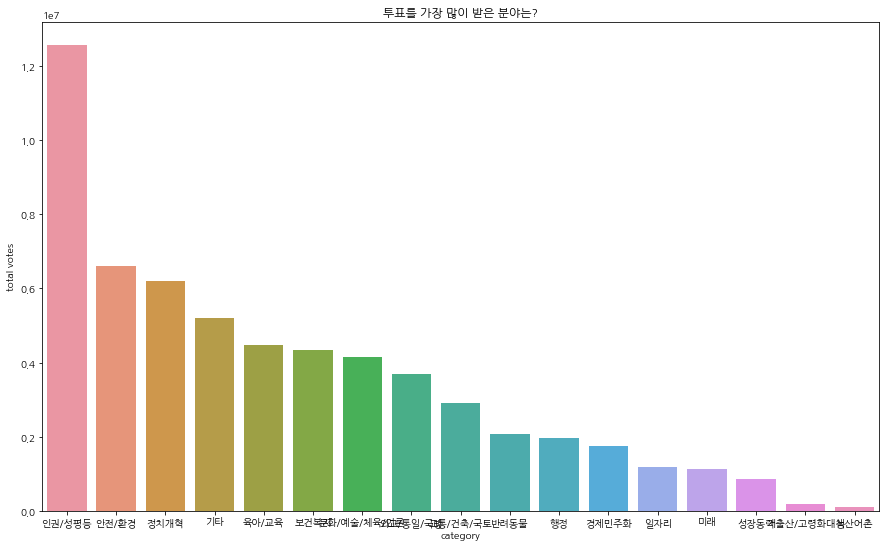

In [35]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='category',y='votes', data=i)
ax.set_ylabel('total votes')
ax.set_title('투표를 가장 많이 받은 분야는?')

#### 1) '전체 청원' 중에서도 <인권/성평등> 분야의 투표 총합이 가장 높다. 이어서 답변 대상 청원 중 투표를 가장 많이 받은; 강서구 피시방 살인사건이 속한 <안전/환경> 분야도 '전체 청원' 중 두 번째로 투표 수가 많다.

#### 2) 가장 적은 청원을 받은 분야였던 <농산어촌> 분야에서, '전체 청원' 투표 총합도 가장 낮다.

### 7. 날짜별 투표 수 시계열 그래프

In [36]:
petitions_start = pd.pivot_table(df, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000] #투표를 가장 많이 받은 날; 2018-10-17

,answer,answer_diff,answered,article_id,no_answer,votes
start,,,,,,
2018-10-17,1,1,0,378900198,925,1300523
2018-10-31,2,2,0,430964099,1008,827096
2018-06-13,1,1,0,146187973,541,786157
2018-10-18,2,2,0,423557789,1030,721524
2018-02-19,1,0,1,99332898,697,701520
2018-11-09,2,2,0,349439392,797,672819
2018-07-22,1,1,0,282639463,897,672491
2017-09-06,1,0,1,22268570,2120,648209
2018-06-24,2,2,0,359345089,1270,628925


In [37]:
time2 = votes_df.sort_values('start')
time3 = time2[['votes']]
time3

,votes
start,
2017-08-19,20703
2017-08-20,31710
2017-08-21,1884
2017-08-22,2607
2017-08-23,13446
...,...
2019-01-31,52267
2019-02-01,44175
2019-02-02,23983


<AxesSubplot:title={'center':'날짜별 투표 수'}, xlabel='start'>

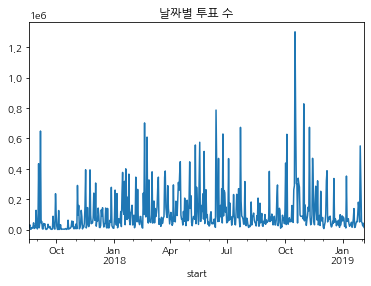

In [38]:
time3['votes'].plot(title = '날짜별 투표 수')

#### 2017-08-19부터 2019-02-04까지 날짜별 청원 수를 나타낸 시계열 그래프이다. 위 그래프에서 투표 수가 가장 높은 지점이 바로 2018-10-17임을 알 수 있다.

In [39]:
n = df.set_index('start')
n.loc['2018-10-17']

,article_id,end,answered,votes,category,title,content,answer,no_answer,answer_diff
start,,,,,,,,,,
2018-10-17,408596,2018-11-16,0,52,일자리,"공무원 비정규직의 정규직 전환 방침, 전면 재검토해주세요.","지금 진행되고 있는 공공분야(공무원, 공사, 공공기관,...)에서의 계약직 직원을 ...",0,1,0
2018-10-17,408597,2018-11-16,0,238,인권/성평등,아동권리와 교사 권리를 동등하게 해주세요,현재 김포 어린이집 교사 자살사건과 관련해 청원글을 올립니다.\n만약 지금 죽음의 ...,0,1,0
2018-10-17,408598,2018-11-16,0,14,육아/교육,특수학교 및 일반학교 특수학급 cctv 설치 의무화,특수학교 및 일반학교 특수학급 cctv 설치 의무화해야합니다. 이번 폭행사건 뿐만 ...,0,1,0
2018-10-17,408599,2018-11-16,0,6,육아/교육,원주 oo 어린이집 3살혀 다짤릴뻔 보험사언과연계 10년이 다돼서 보상받음,아들둘 키우고 있습니다.10년이 넘은 예기를 하고자합니다.어려운 가정 형편에 국공립...,0,1,0
2018-10-17,408601,2018-11-16,0,49,교통/건축/국토,주택소유이력이 있는 신혼부부만 특별 공급 제외는 부당합니다.,저는 부산에서 두자녀를 키우며 외벌이를 하고 있는 소득기준 100% 이내의 흙수저 ...,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2018-10-17,409778,2018-11-16,0,1,기타,삼청교육대학 설립추진,삼청교육대학 개강중에는 그많던 깡패들이 없어졌어요.재판시 사회봉사 명령보다는 삼청교...,0,1,0
2018-10-17,409779,2018-11-16,0,2,정치개혁,김지수 음주운전에 관련한 법을 만들어 주세요.,배우 김지수가 얼마나 유명한지 모르겠지만...\n음주사고로 고통 주는 가해자와 음주...,0,1,0
2018-10-17,409781,2018-11-16,0,37,정치개혁,꼭들어주세요 부탁드립니다,지금이라도 늦지않았습니다\n제발 난민 취소해주세요\n안전한 나라에서 살고싶습니다,0,1,0


In [40]:
nn = n.loc['2018-10-17']
nn.sort_values('votes', ascending=False).head()

,article_id,end,answered,votes,category,title,content,answer,no_answer,answer_diff
start,,,,,,,,,,
2018-10-17,408609,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,0,1
2018-10-17,408989,2018-11-16,0,53615,인권/성평등,유흥탐정. 데이터베이스 성매매남성 조사합시다.,성매매는 불법입니다.\n이번에 유흥탐정 운영자 구속되었다고 하던데\n업주들만 쓴다는...,0,1,0
2018-10-17,409477,2018-11-16,0,5831,육아/교육,영양교사 제도를 폐지하고 본래의 식품위생직 공무원 선발로 환원해 주시기 바랍니다.,청원에 앞서 학교에서 따뜻하게 밥 한 끼를 만들어주시는 급식종사자 여러분들 그리고 ...,0,1,0
2018-10-17,408759,2018-11-16,0,4611,외교/통일/국방,[긴급]피지에 있는 400여명을 살려 주세요,제발 도와주십시오.\n피지에서 현대판 노예생활을 하고 있는 400여명을 제발 구해주...,0,1,0
2018-10-17,408885,2018-11-16,0,3484,외교/통일/국방,"*(긴급)제주 예맨 난민 339명 인도적체류 허가, 이게 정부냐",결국엔 모두 인도체류로 출도해제로 전국 어디로 갈수 있게 만들었다\n정부는...,0,1,0


#### 2018-10-17 당시 <안전/환경> 분야에서 무려 1192049건의 투표를 받았으며, 이는 역대 가장 많은 투표를 받았던 '강서구 피시방 살인 사건'에 대한 청원이다.

### 8. 청원을 많이 받은 날 VS 투표를 많이 받은 날

In [41]:
votes_df = votes_df.reset_index()
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('counts', ascending=False)[:5] #청원을 많이 받은 날 상위 5개 목록

,start,counts,answer,answer_diff,answered,article_id,no_answer,votes
0,2017-11-11,9623,0,0,0,348559310,9623,85074
1,2017-09-05,5952,0,0,0,38414241,5952,48808
2,2018-01-11,3368,0,0,0,291069195,3368,44570
3,2018-02-06,2631,0,0,0,342371897,2631,83038
4,2017-11-09,2487,0,0,0,73459579,2487,34774


In [42]:
hottest_day_df.sort_values('votes', ascending=False)[:5] #투표를 많이 받은 날 상위 5개 목록

,start,counts,answer,answer_diff,answered,article_id,no_answer,votes
116,2018-10-17,926,1,1,0,378900198,925,1300523
81,2018-10-31,1010,2,2,0,430964099,1008,827096
384,2018-06-13,542,1,1,0,146187973,541,786157
72,2018-10-18,1032,2,2,0,423557789,1030,721524
270,2018-02-19,698,1,0,1,99332898,697,701520


### 9. 청원이 가장 많이 들어온 달 / 일 / 요일 ?

In [43]:
import datetime
df['start_month'] = df['start'].dt.month
df['start_day'] = df['start'].dt.day
df['start_hour'] = df['start'].dt.hour
df['start_dow'] = df['start'].dt.dayofweek

In [44]:
df

,article_id,start,end,answered,votes,category,title,content,answer,no_answer,answer_diff,start_month,start_day,start_hour,start_dow
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,0,1,0,8,19,0,5
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,0,1,0,8,19,0,5
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0,1,0,8,19,0,5
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,0,1,0,8,19,0,5
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0,1,0,8,19,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...,0,1,0,2,4,0,0
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...,0,1,0,2,4,0,0
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...,0,1,0,2,4,0,0
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하...",0,1,0,2,4,0,0


In [45]:
month_df = pd.DataFrame(df['start_month'].value_counts()).reset_index()
month_df.columns = ['start_month', 'counts']
month_df = month_df.sort_values('start_month', ascending=True)
month_df

,start_month,counts
0,1,52941
6,2,28117
11,3,21795
10,4,23227
8,5,25499
9,6,25483
7,7,25714
5,8,28851
2,9,40888
4,10,31687


Text(0.5, 1.0, '청원이 가장 많이 들어온 달은?')

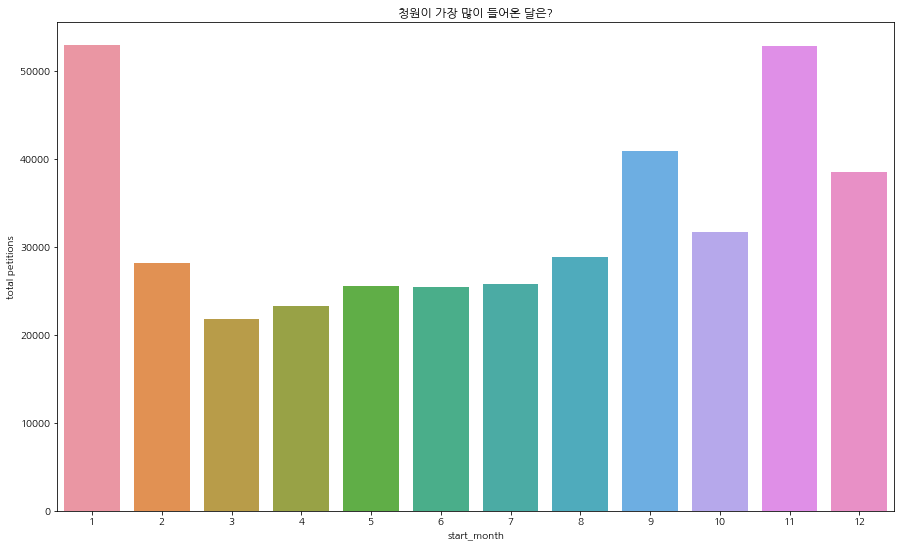

In [46]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='start_month',y='counts', data=month_df)
ax.set_ylabel('total petitions')
ax.set_title('청원이 가장 많이 들어온 달은?')

#### 1) 청원이 가장 많이 들어온 달은 1월이다. 몇 십개 차이로 11월은 청원이 두 번째로 많이 들어온 달이다.
#### 2) 반면 청원이 가장 적게 들어온 달은 3월이다.

In [47]:
day_df = pd.DataFrame(df['start_day'].value_counts()).reset_index()
day_df.columns = ['start_day', 'counts']
day_df = day_df.sort_values('start_day', ascending=True)
day_df

,start_day,counts
24,1,11766
25,2,11730
18,3,12270
9,4,12717
1,5,17307
2,6,14766
15,7,12489
16,8,12297
5,9,13107
28,10,11412


Text(0.5, 1.0, '청원이 가장 많이 들어온 일은?')

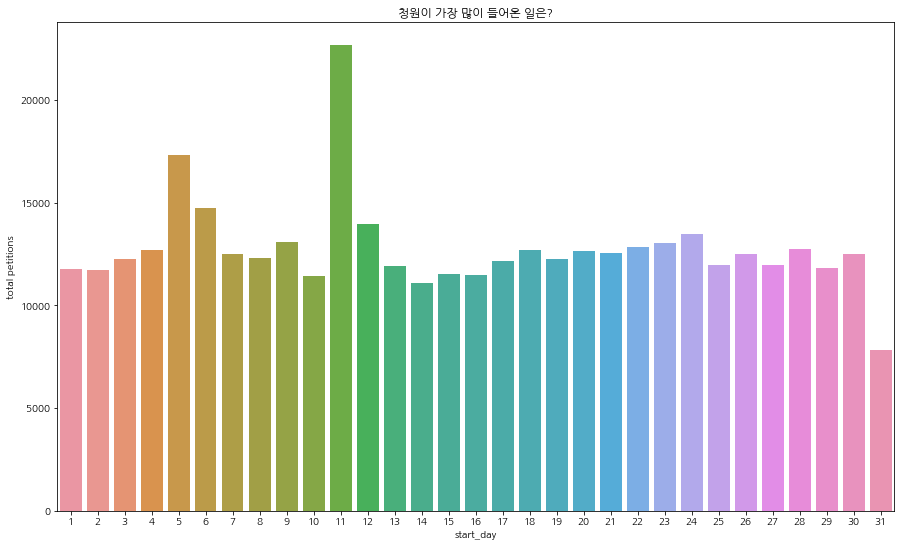

In [48]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='start_day',y='counts', data=day_df)
ax.set_ylabel('total petitions')
ax.set_title('청원이 가장 많이 들어온 일은?')

#### 1) 청원이 가장 많이 들어온 일은 11일이 독보적으로 많다.
#### 2) 반면 청원이 가장 적게 들어온 일은 31일이다. 아무래도 31일은 1월, 3월, 5월, 7월, 8월, 10월, 12월에만 있으므로 이러한 결과가 나온 것이라고 유추할 수 있다.

In [49]:
dow_df = pd.DataFrame(df['start_dow'].value_counts()).reset_index()
dow_df.columns = ['start_dow', 'counts']
dow_df = dow_df.sort_values('start_dow', ascending=True)
dow_df #일(0), 월(1), 화(2), 수(3), 목(4), 금(5), 토(6)

,start_dow,counts
4,0,54234
0,1,65229
2,2,61966
1,3,63072
3,4,56646
5,5,50984
6,6,43416


Text(0.5, 1.0, '청원이 가장 많이 들어온 요일은?')

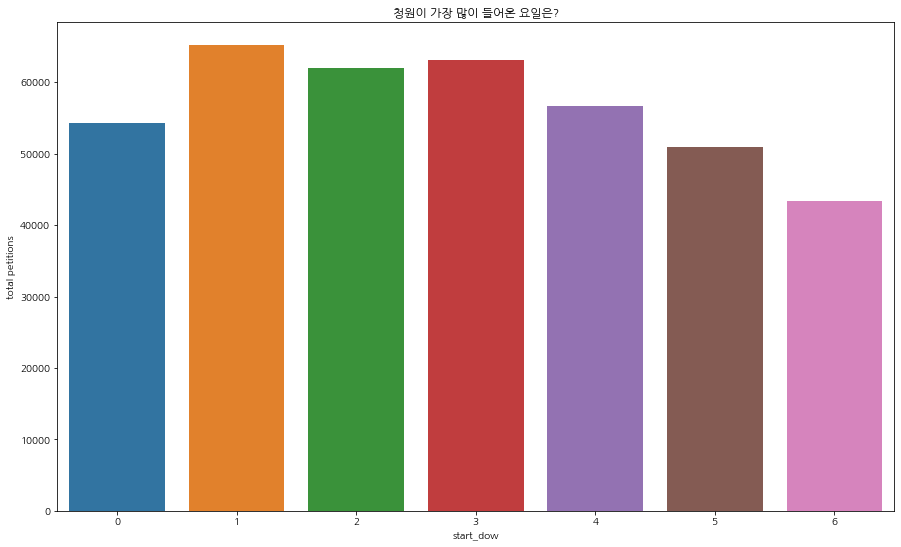

In [50]:
ax = plt.subplots(figsize=(15, 9)) 
ax = sns.barplot(x='start_dow',y='counts', data=dow_df)
ax.set_ylabel('total petitions')
ax.set_title('청원이 가장 많이 들어온 요일은?')

#### 1) 청원이 가장 많이 들어온 요일은 월요일이다. 주말이 지나고 월요일에 본격적으로 한 주가 시작되어 새로운 뉴스와 기사가 보도되곤 하므로, 이를 짐작해볼 수 있다.
#### 2) 반면 청원이 가장 적게 들어온 일은 토요일이다. 월요일에서부터 토요일까지 청원 수가 점진적으로 감소하는 추세를 볼 수 있다.